# Phân tích bộ dữ liệu `Heart Disease`


## 1. Preparing datasets

Áp dụng One-Hot Encoding...
Số lượng features sau One-Hot Encoding: 30

Xử lý các giá trị bị thiếu...

Chia dữ liệu thành tập train và test...
Class original:


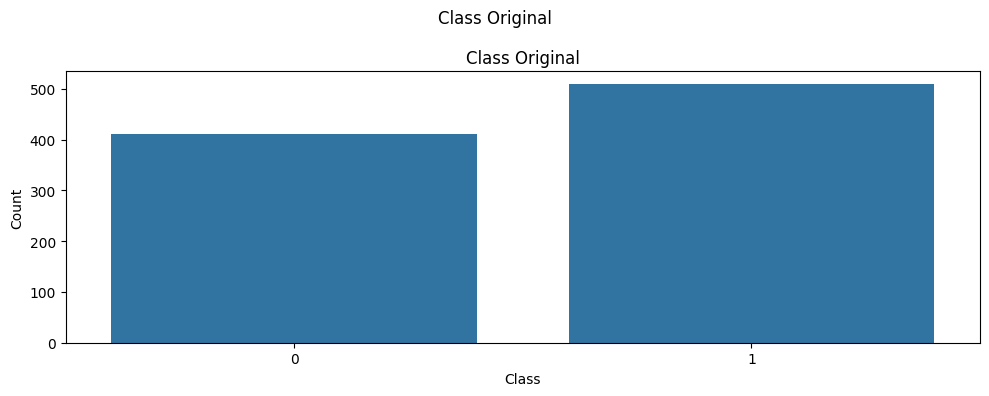

Class distribution (60/40)


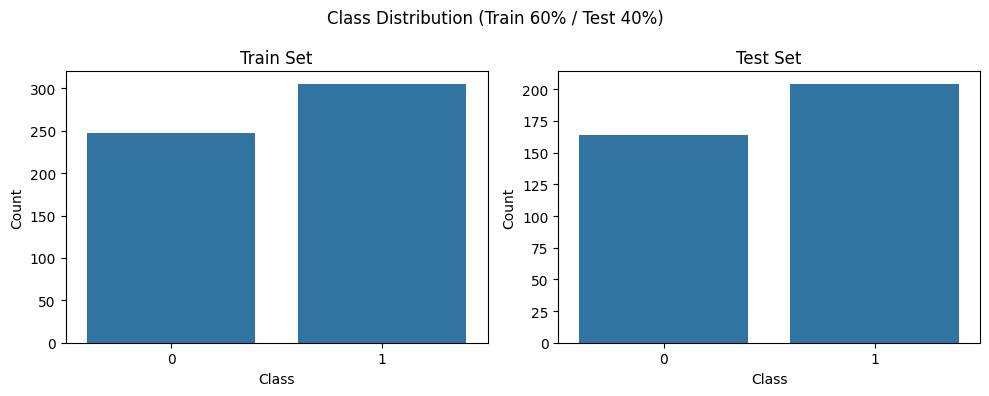

Class distribution (40/60)


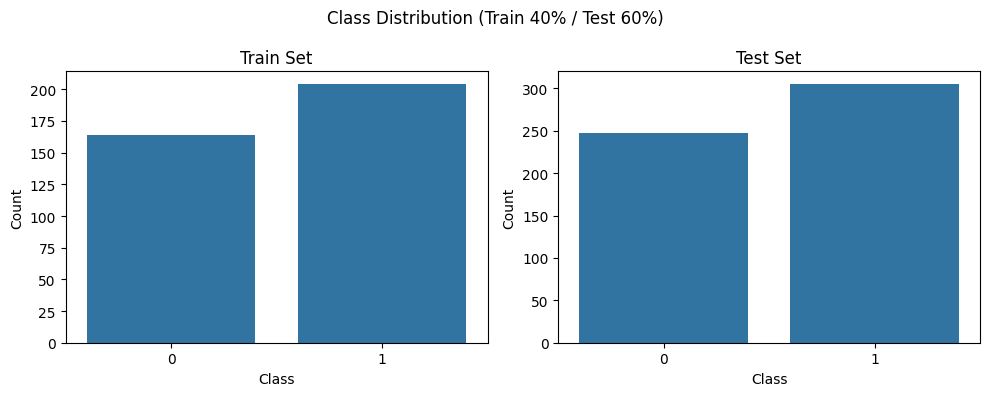

Class distribution (80/20)


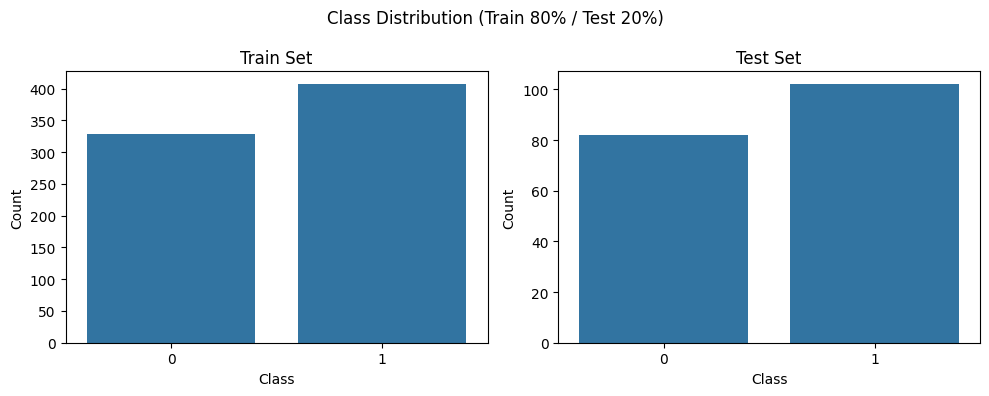

Class distribution (90/10)


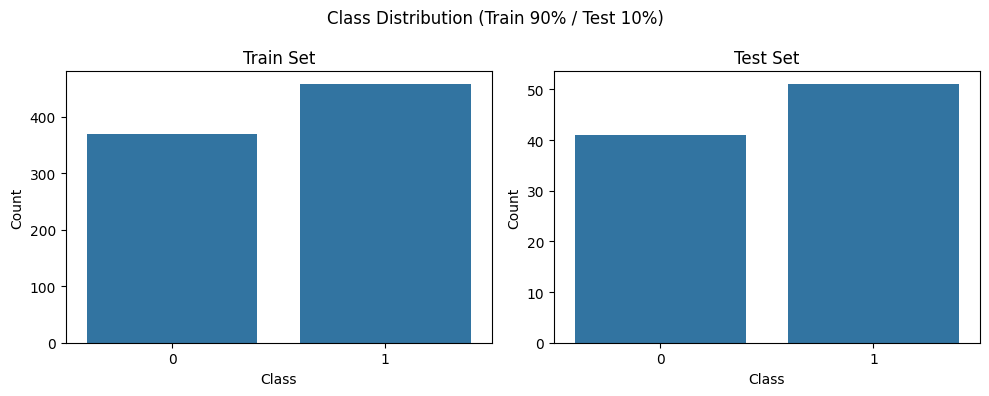

Hoàn tất xử lý dữ liệu!


In [1]:
# %pip install numpy matplotlib seaborn graphviz

# --- Thư viện cơ bản ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os

# --- Thư viện cho Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Định nghĩa các đường dẫn ---
# Đi từ `notebooks` ra ngoài một cấp để thấy các thư mục khác
DATA_PATH = '../data/heart_disease.csv'
OUTPUT_DIR = '../outputs/heart_disease/'
# Tạo thư mục output nếu nó chưa tồn tại
os.makedirs(OUTPUT_DIR, exist_ok=True)

# (Tùy chọn) Thêm thư mục src vào path để import các hàm từ utils.py
import sys
sys.path.append('../')
from src.utils import plot_label_distribution, plot_label_original, build_decision_tree, evaluating_decision_tree_class # Ví dụ nếu bạn có hàm riêng

from sklearn.impute import SimpleImputer

# --- Tải và khám phá dữ liệu ---
df = pd.read_csv(DATA_PATH)

# Chuyển cột 'num' thành nhãn nhị phân (0: không bệnh, 1: có bệnh)
df['num'] = (df['num'] > 0).astype(int)

# 1. Tách features và labels
features = df.drop('num', axis=1)
labels = df['num']

# 2. Áp dụng One-Hot Encoding
print("Áp dụng One-Hot Encoding...")
features_encoded = pd.get_dummies(features)
print(f"Số lượng features sau One-Hot Encoding: {features_encoded.shape[1]}")

# 3. Xử lý giá trị thiếu (NaN)
print("\nXử lý các giá trị bị thiếu...")
imputer = SimpleImputer(strategy='median')
# Dùng features_final để lưu lại kết quả cuối cùng
features_final = pd.DataFrame(imputer.fit_transform(features_encoded), columns=features_encoded.columns)

# 4. Chia dữ liệu train/test (SỬ DỤNG features_final)
print("\nChia dữ liệu thành tập train và test...")

# Phân chia train và test theo tỷ lệ
feature_train_60, feature_test_40, label_train_60, label_test_40 = train_test_split(
        features_final, labels, test_size=0.4, shuffle=True, stratify=labels, random_state=42)

feature_train_40, feature_test_60, label_train_40, label_test_60 = train_test_split(
        features_final, labels, test_size=0.6, shuffle=True, stratify=labels, random_state=42)

feature_train_80, feature_test_20, label_train_80, label_test_20 = train_test_split(
        features_final, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42)

feature_train_90, feature_test_10, label_train_90, label_test_10 = train_test_split(
        features_final, labels, test_size=0.1, shuffle=True, stratify=labels, random_state=42)

#Tạo biểu đồ ban đầu
plot_label_original(labels, OUTPUT_DIR)

# Tạo các biểu đồ được phân chia
plot_label_distribution(label_train_60, label_test_40, 60, 40, OUTPUT_DIR)
plot_label_distribution(label_train_40, label_test_60, 40, 60, OUTPUT_DIR)
plot_label_distribution(label_train_80, label_test_20, 80, 20, OUTPUT_DIR)
plot_label_distribution(label_train_90, label_test_10, 90, 10, OUTPUT_DIR)

print("Hoàn tất xử lý dữ liệu!")

## 2. Building the decision tree classifiers


Decision tree 60/40


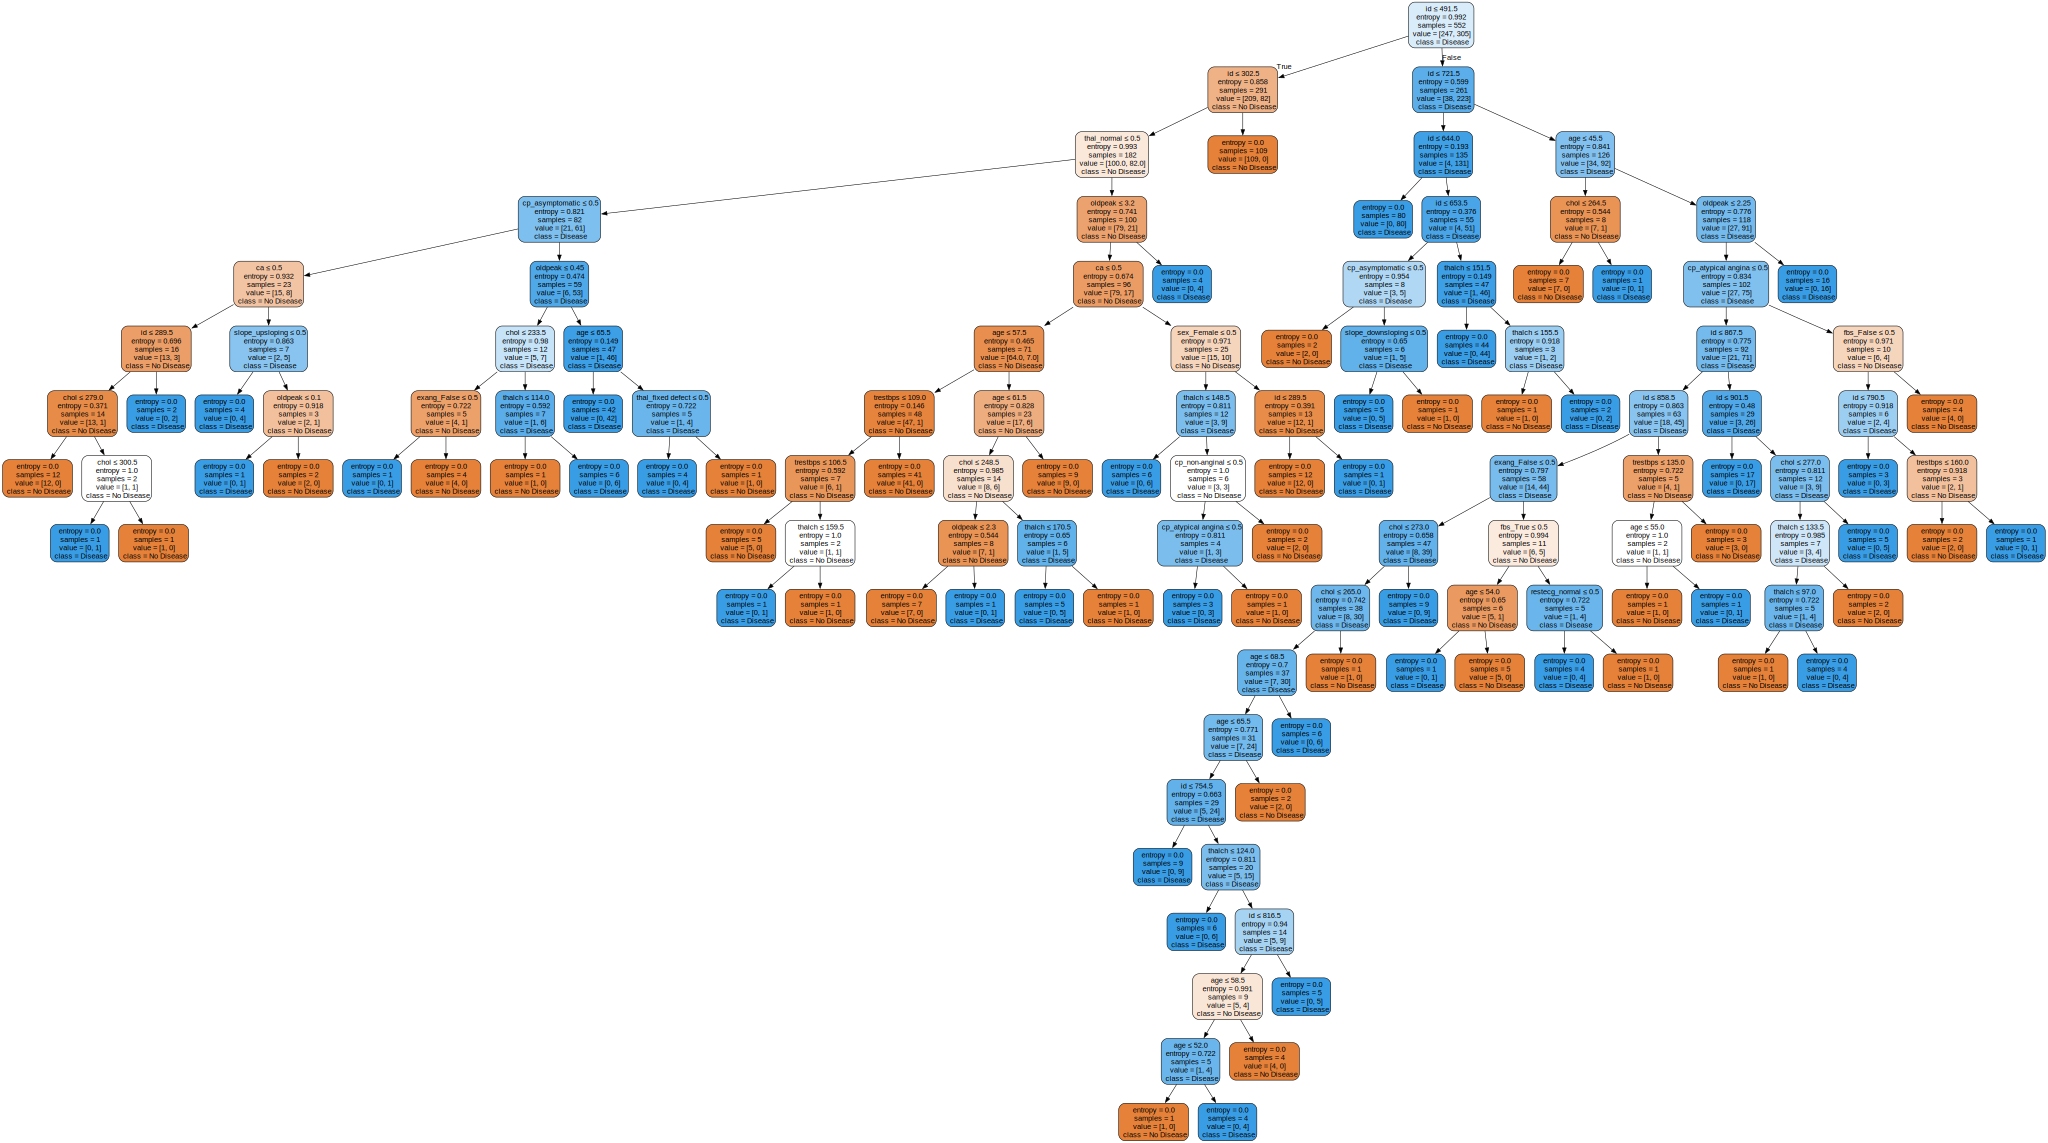

Decision tree 40/60


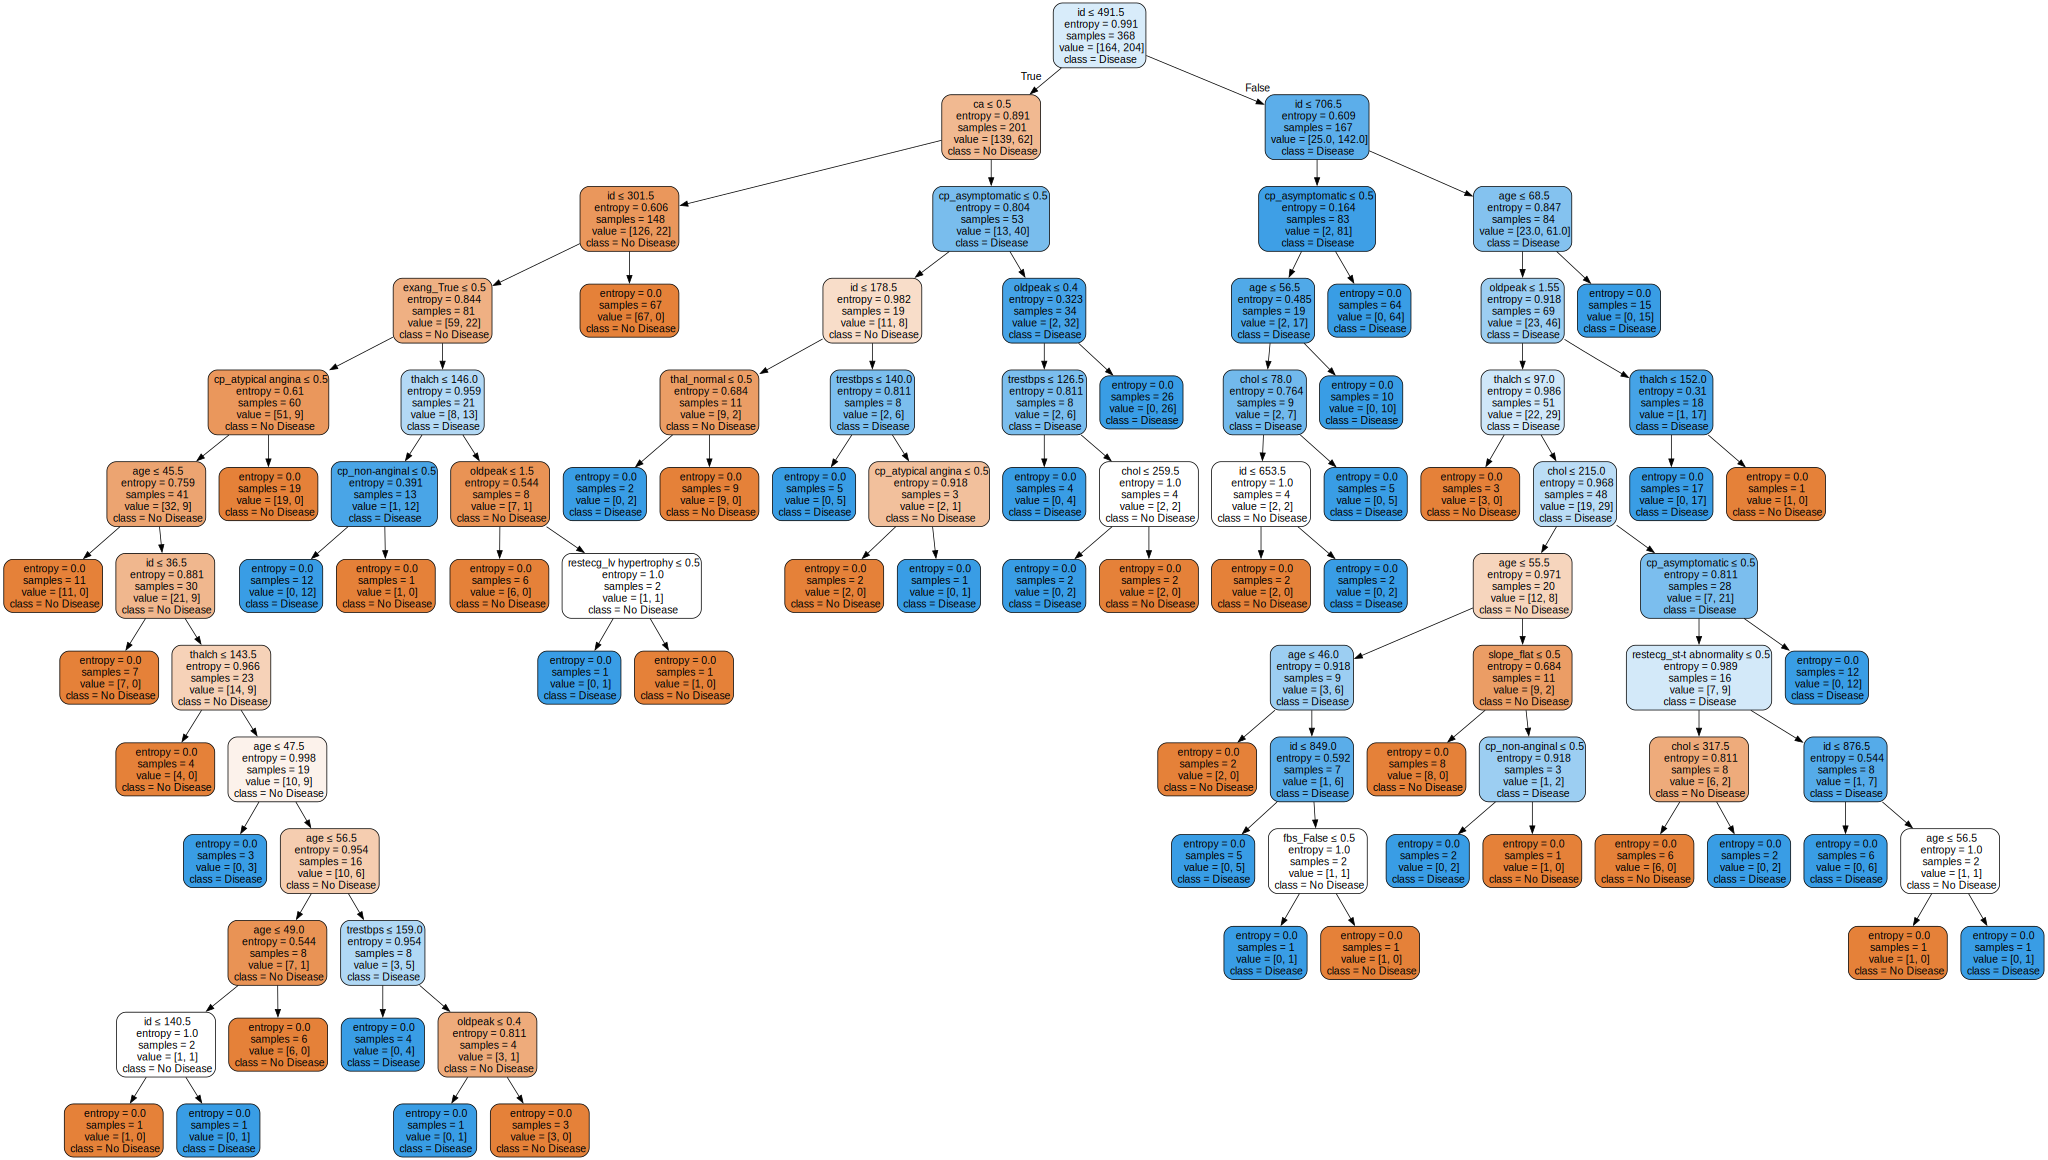

Decision tree 80/20


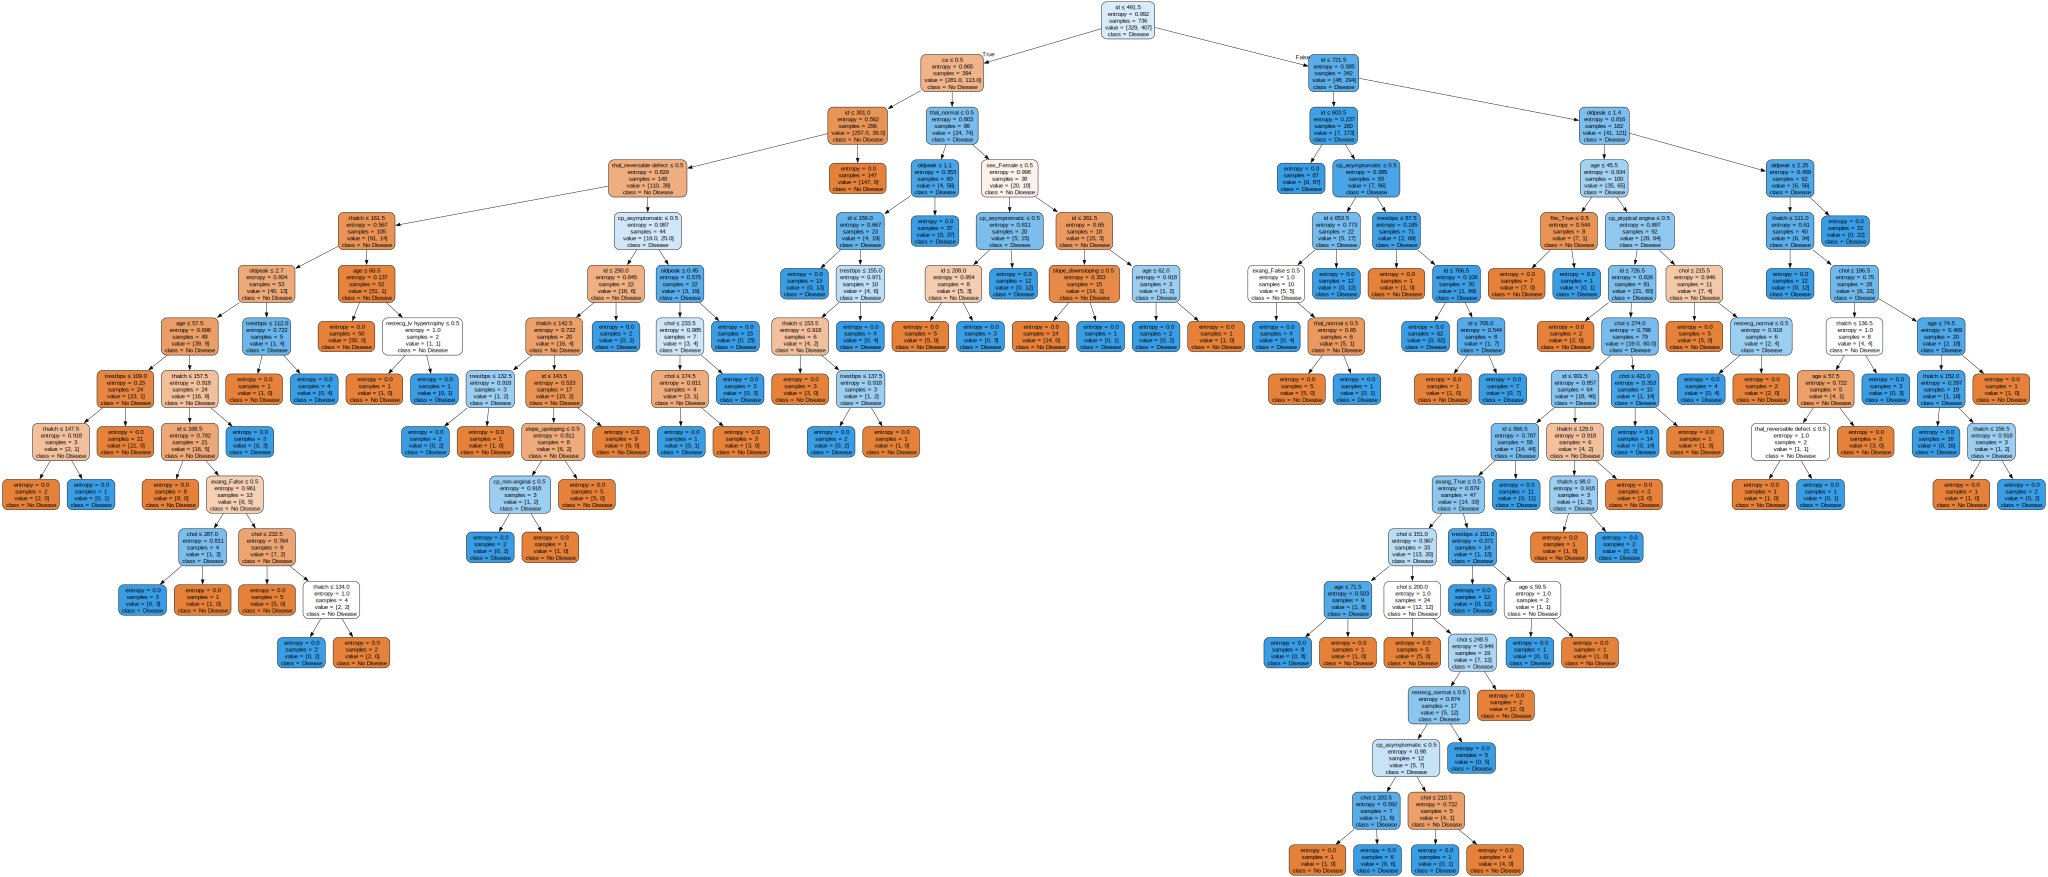

Decision tree 90/10


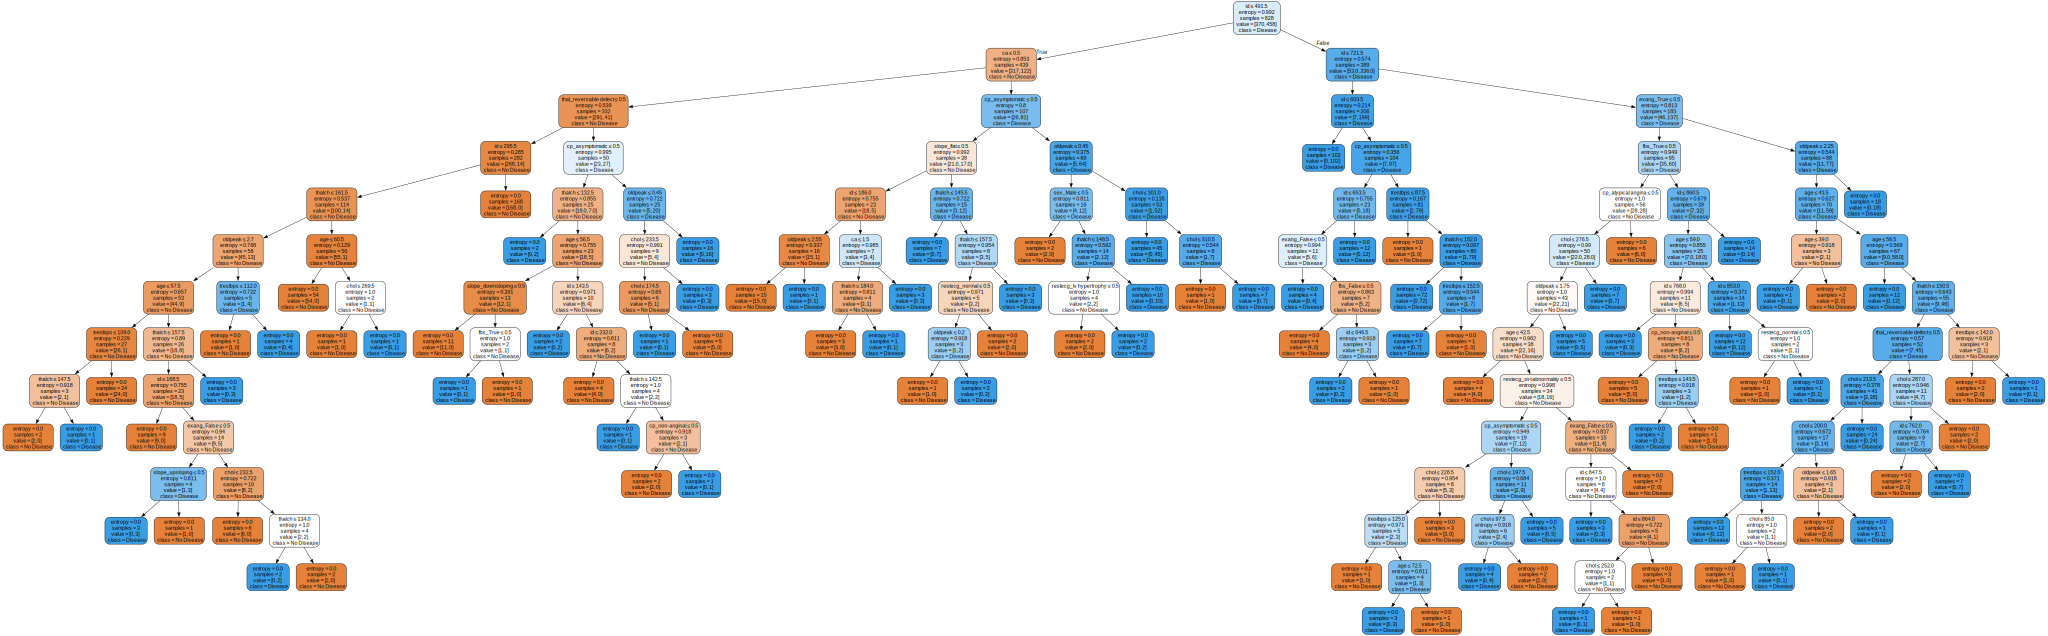

In [2]:
clf_60_40 = build_decision_tree(features_final, feature_train_60, label_train_60, 60, 40, OUTPUT_DIR)

clf_40_60 = build_decision_tree(features_final, feature_train_40, label_train_40, 40, 60, OUTPUT_DIR)

clf_80_20 = build_decision_tree(features_final, feature_train_80, label_train_80, 80, 20, OUTPUT_DIR)

clf_90_10 = build_decision_tree(features_final, feature_train_90, label_train_90, 90, 10, OUTPUT_DIR)

## 3. Evaluating the decision tree classifiers


In [3]:
evaluating_decision_tree_class(clf_40_60, feature_test_60, label_test_60, 40, 60, OUTPUT_DIR)

evaluating_decision_tree_class(clf_60_40, feature_test_40, label_test_40, 60, 40, OUTPUT_DIR)

evaluating_decision_tree_class(clf_80_20, feature_test_20, label_test_20, 80, 20, OUTPUT_DIR)

evaluating_decision_tree_class(clf_90_10, feature_test_10, label_test_10, 90, 10, OUTPUT_DIR)

Classification Report (40/60) đã được lưu tại: ../outputs/heart_disease/reports//classification_report_40_60.txt
Confusion Matrix (Depth=12, 40/60 Split) đã được lưu tại: ../outputs/heart_disease/matrices/confusion_matrix_40_60.png
Classification Report (60/40) đã được lưu tại: ../outputs/heart_disease/reports//classification_report_60_40.txt
Confusion Matrix (Depth=17, 60/40 Split) đã được lưu tại: ../outputs/heart_disease/matrices/confusion_matrix_60_40.png
Classification Report (80/20) đã được lưu tại: ../outputs/heart_disease/reports//classification_report_80_20.txt
Confusion Matrix (Depth=16, 80/20 Split) đã được lưu tại: ../outputs/heart_disease/matrices/confusion_matrix_80_20.png
Classification Report (90/10) đã được lưu tại: ../outputs/heart_disease/reports//classification_report_90_10.txt
Confusion Matrix (Depth=13, 90/10 Split) đã được lưu tại: ../outputs/heart_disease/matrices/confusion_matrix_90_10.png


## 4. The depth and accuracy of a decision tree


Đang tạo cây quyết định...
Tree depth = None


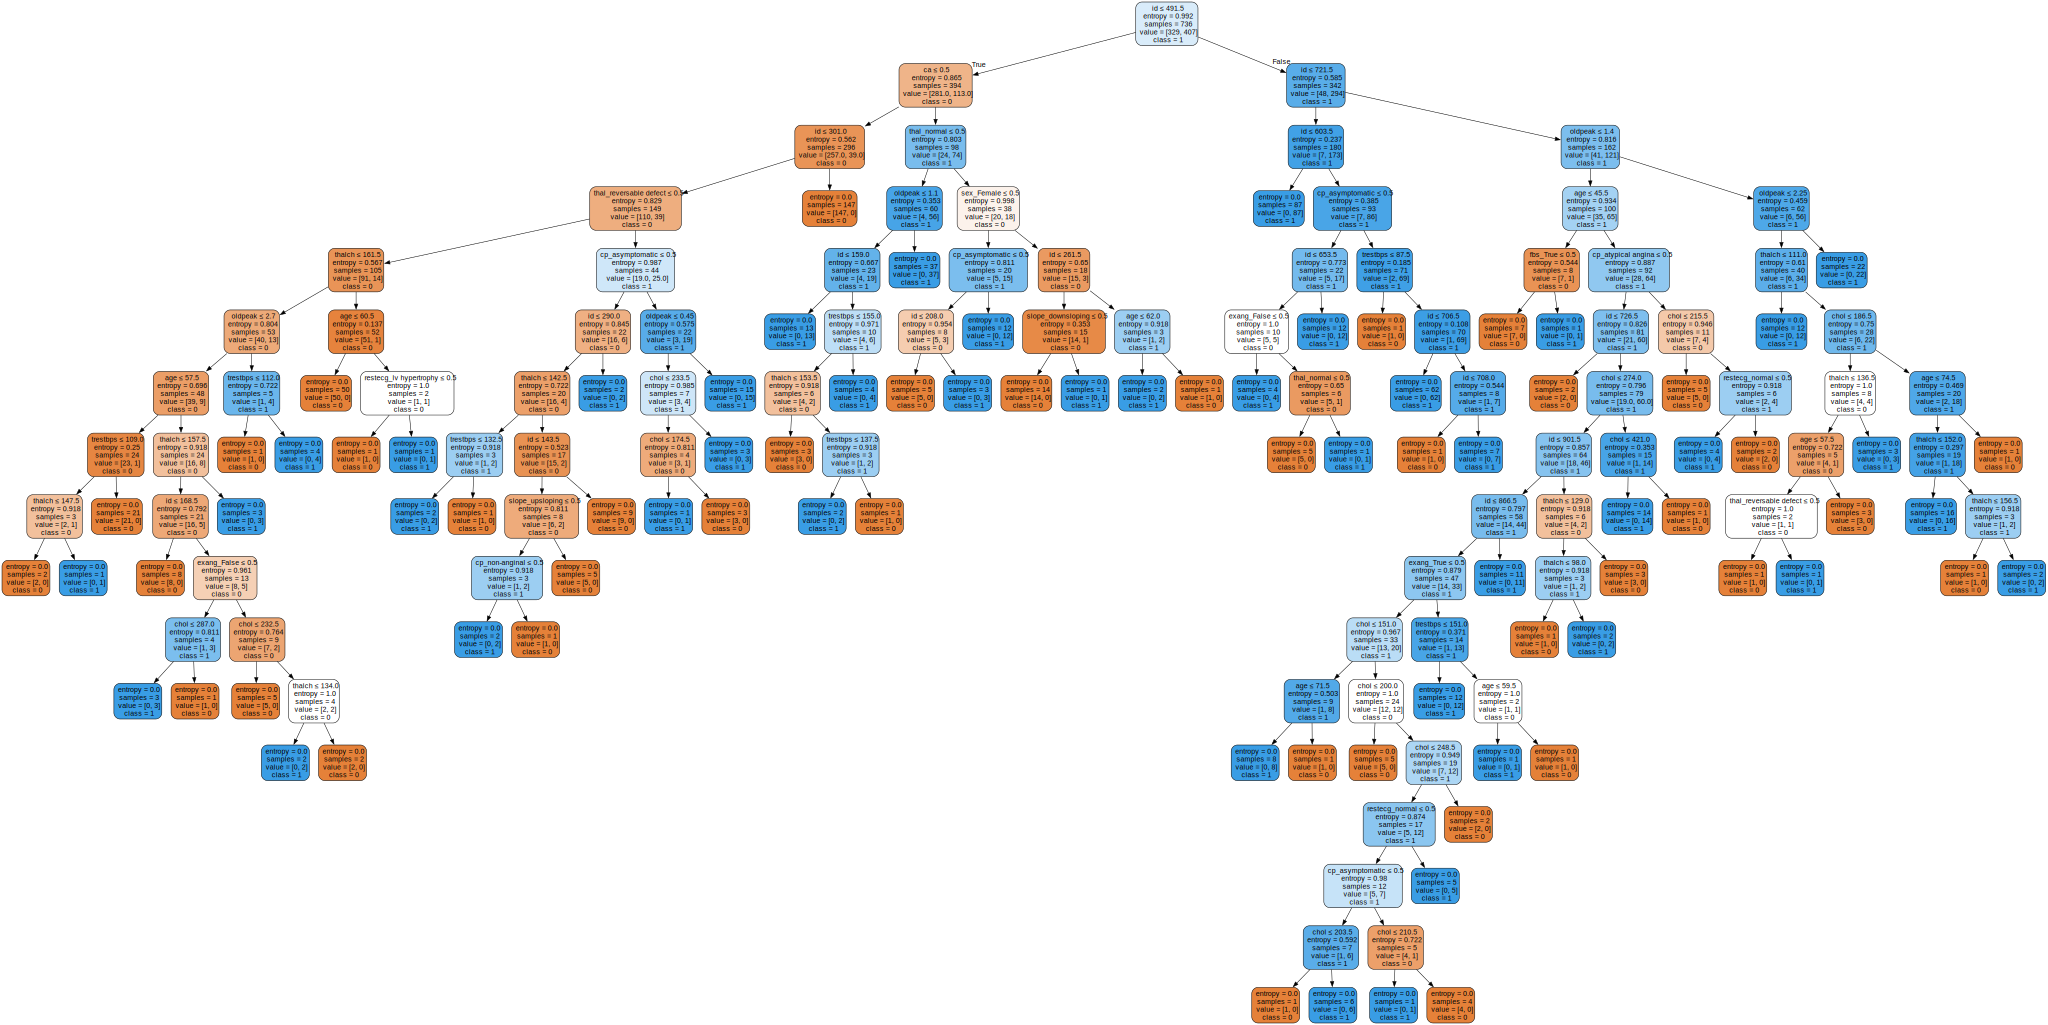

Đang tạo cây quyết định với độ sâu là 2 ...
Tree depth = 2


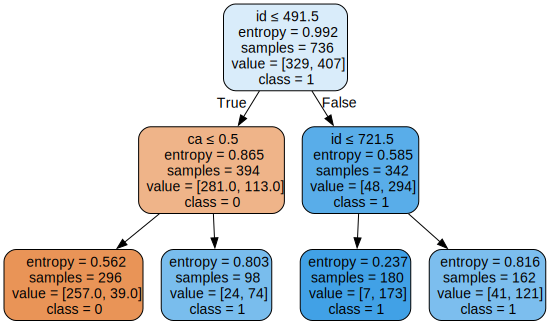

Đang tạo cây quyết định với độ sâu là 3 ...
Tree depth = 3


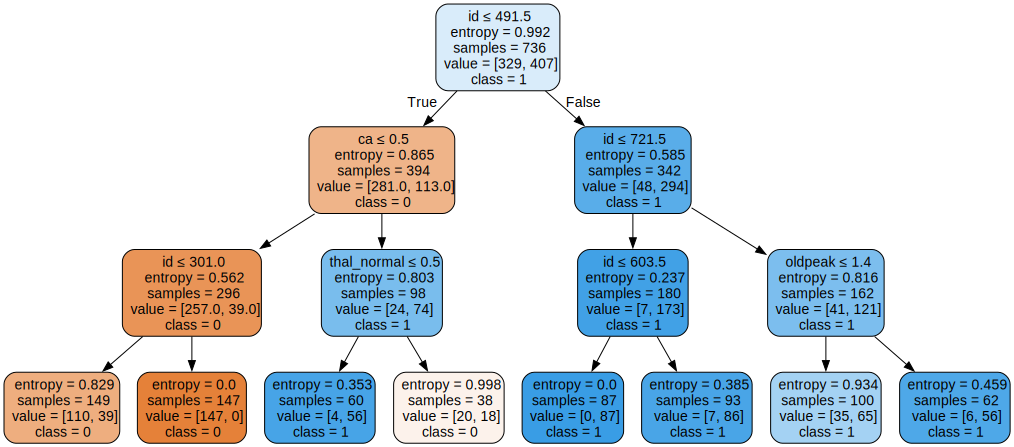

Đang tạo cây quyết định với độ sâu là 4 ...
Tree depth = 4


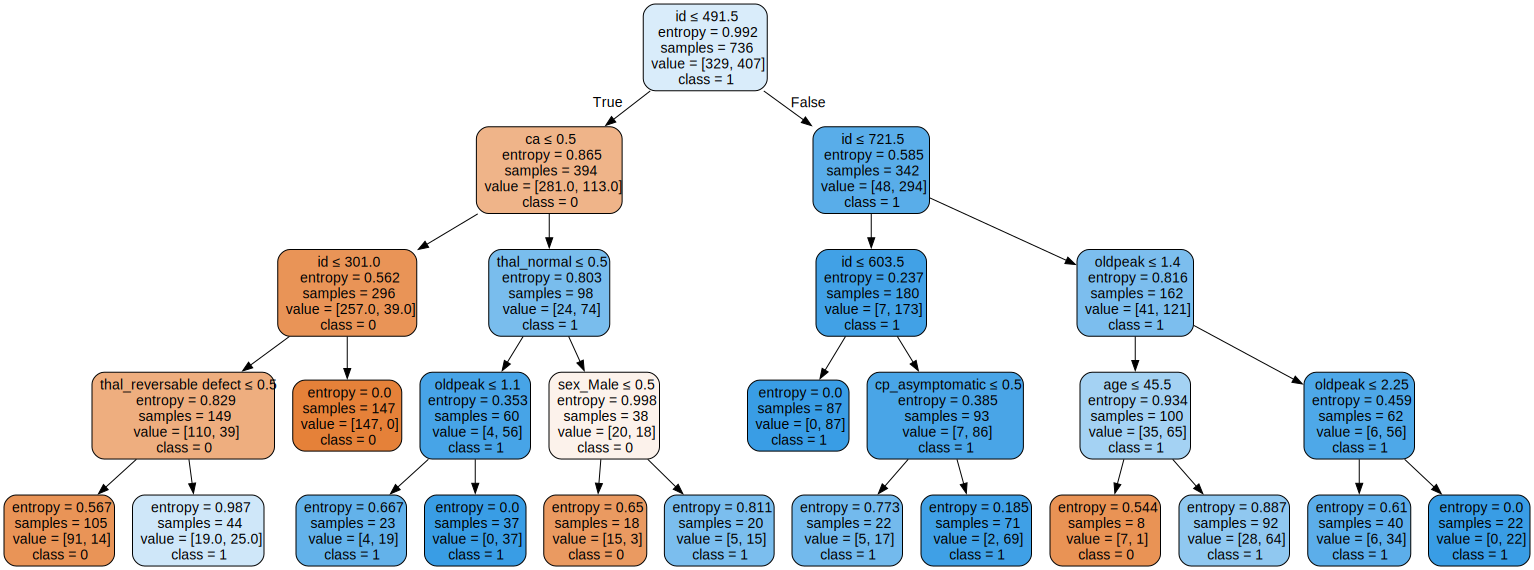

Đang tạo cây quyết định với độ sâu là 5 ...
Tree depth = 5


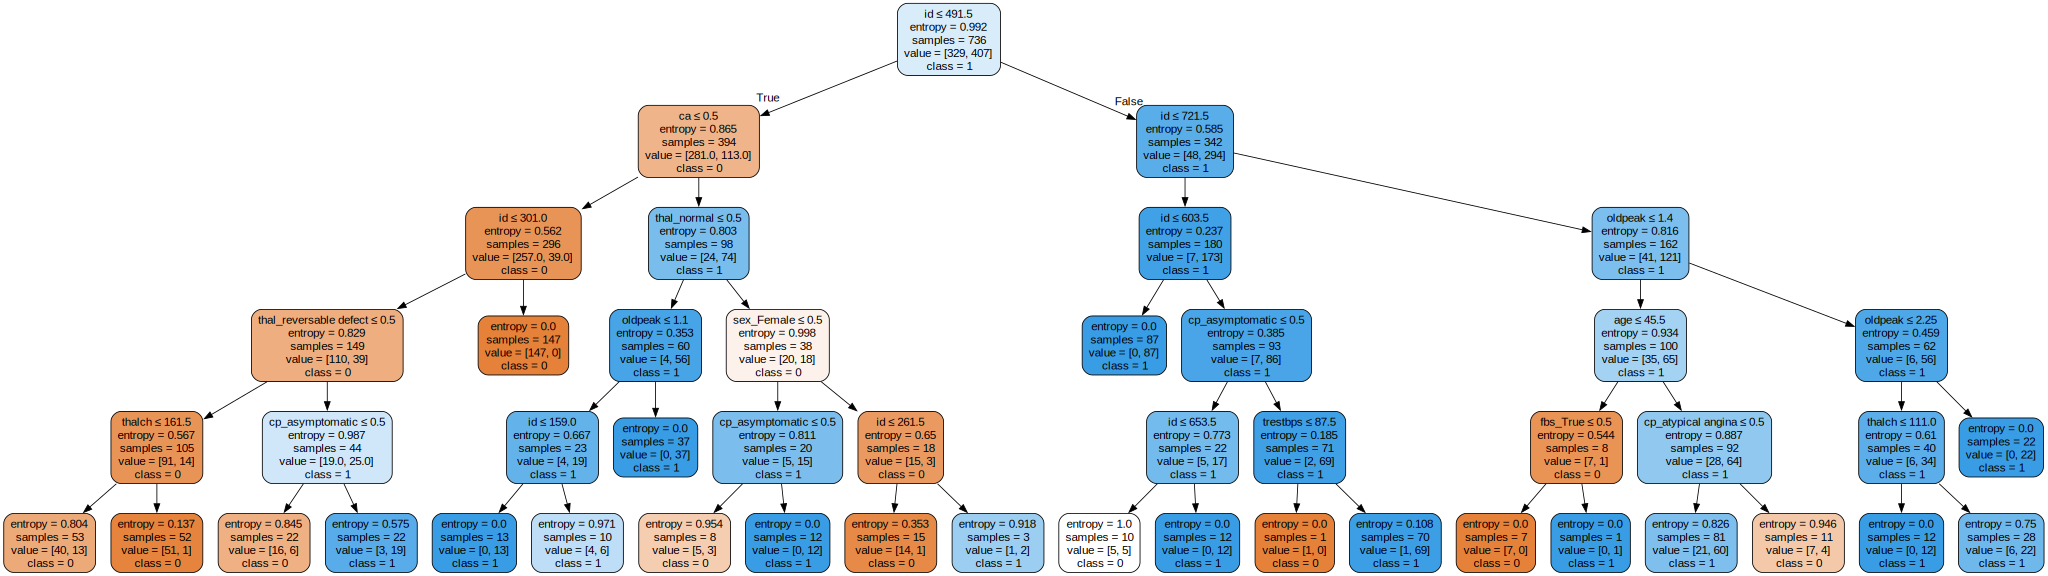

Đang tạo cây quyết định với độ sâu là 6 ...
Tree depth = 6


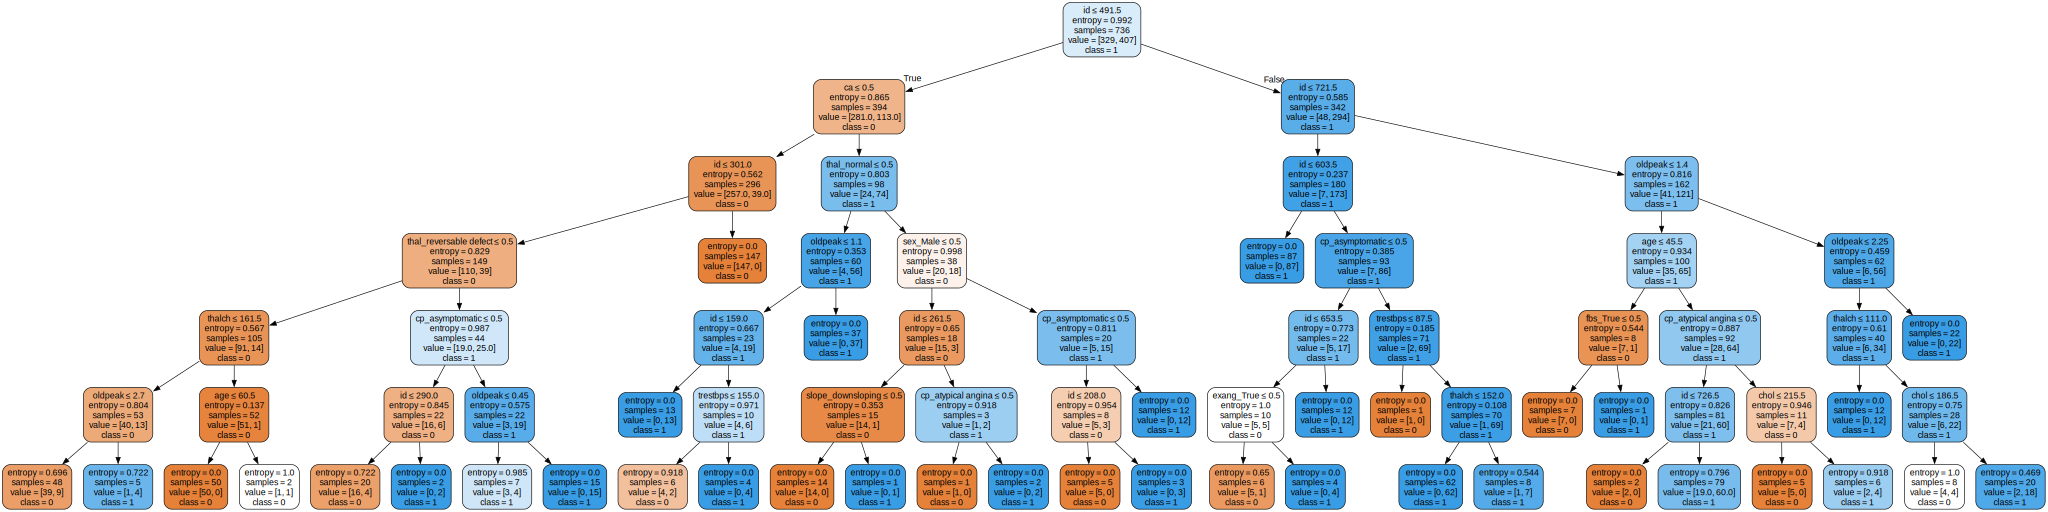

Đang tạo cây quyết định với độ sâu là 7 ...
Tree depth = 7


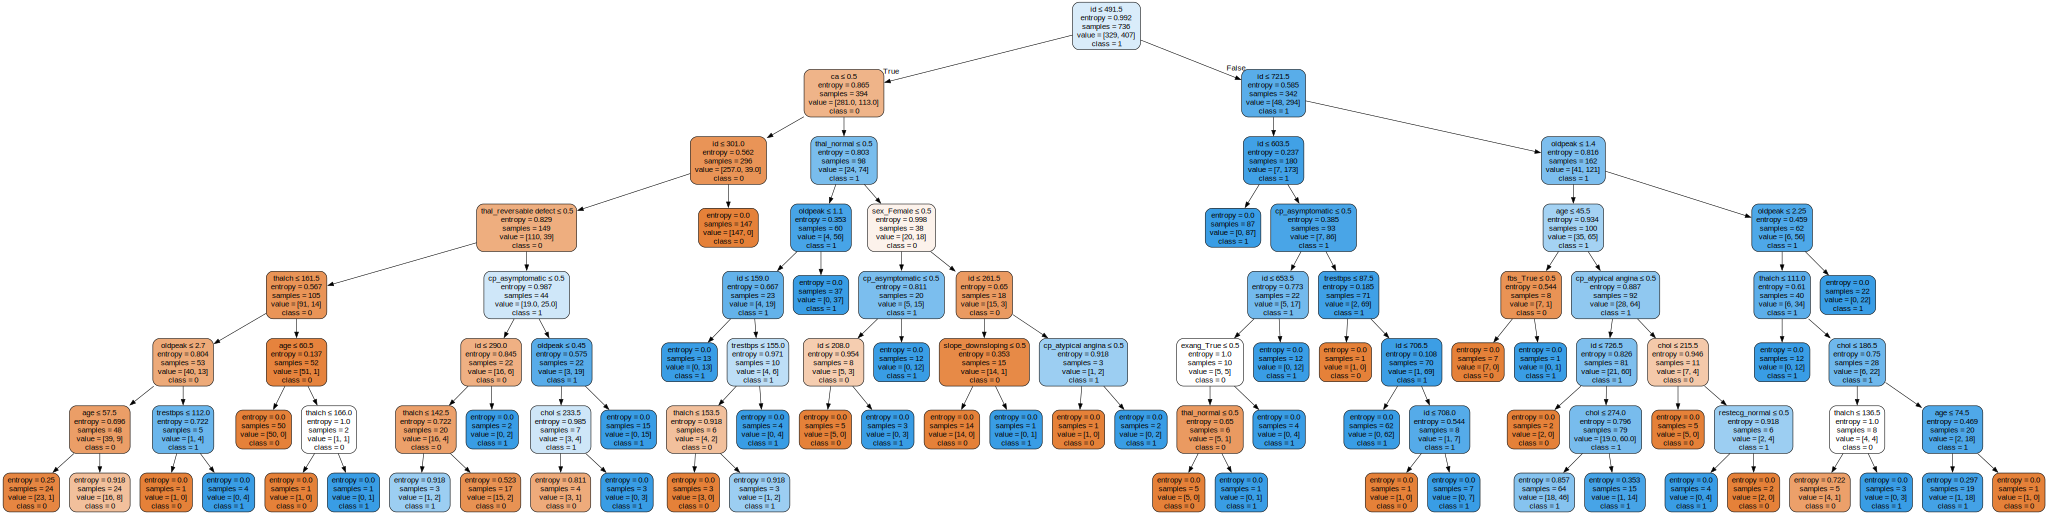

Đang tạo bảng accuracy_score...
Đã tạo bảng accuracy_score tại ../outputs/heart_disease/acc/accuracy_score.csv
Đã tạo biểu đồ accuracy_score tại ../outputs/heart_disease/acc/accuracy_vs_depth.png


In [4]:
from IPython.display import display

# Độ sâu
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

output_dir = '../outputs/heart_disease/acc/'
os.makedirs(output_dir, exist_ok=True)
results = []

for depth in depths:
    str_depth = f" với độ sâu là {depth} " if depth is not None else ""
    print(f"Đang tạo cây quyết định{str_depth}...")
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(feature_train_80, label_train_80)
    y_pred = clf.predict(feature_test_20)
    acc = accuracy_score(label_test_20, y_pred)
    accuracies.append(acc)

    results.append({
        "max_depth": str(depth),
        "Accuracy": acc
    })
    
    # Vẽ và lưu cây
    dot_data = export_graphviz(clf, out_file=None, feature_names=features_final.columns, class_names=["0", "1"],
                               filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    filename = f"{output_dir}tree_depth_{depth if depth else 'None'}"
    graph.render(filename=filename, format="pdf", cleanup=True)
    print(f"Tree depth = {depth if depth else 'None'}")
    display(graph)

print("Đang tạo bảng accuracy_score...")

# Chuyển sang dict với key là max_depth, value là accuracy
accuracy_dict = {entry["max_depth"]: entry["Accuracy"] for entry in results}

# Tạo DataFrame dạng 1 dòng, với index là Accuracy
results_df = pd.DataFrame([accuracy_dict], index=["Accuracy"])
results_df.columns.name = "max_depth"  # Gán tên cột

# Lưu vào CSV
results_df.to_csv(f"{output_dir}accuracy_score.csv", index=True, index_label="max_depth")
print(f"Đã tạo bảng accuracy_score tại {output_dir}accuracy_score.csv")

plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in depths], accuracies, marker='o')
plt.title("Chart")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig(f"{output_dir}accuracy_vs_depth.png")
plt.close()
print(f"Đã tạo biểu đồ accuracy_score tại {output_dir}accuracy_vs_depth.png")